In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import dask.dataframe as dd

In [ ]:
df_sample = pd.read_csv('credit_card_fraud.csv').sample(n=1000, random_state=42)
df_sample = pd.read_csv('credit_card_fraud.csv', nrows=1000)
print(df_sample.columns)

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long'],
      dtype='object')


In [8]:
df_sample['is_fraud'].value_counts()

is_fraud
0    959
1     41
Name: count, dtype: int64

In [ ]:
df_sample.shape
#df_sample.to_csv('credit_card_fraud_sample_10K.csv', index=False)

In [19]:
#busiest card fraud in the month
df = pd.read_csv('credit_card_fraud_2019_q4.csv')

In [20]:
(df['is_fraud'].value_counts() / df.shape[0]) * 100


is_fraud
0    99.545738
1     0.454262
Name: count, dtype: float64

In [ ]:
#credit catd types

# Function to determine credit card type based on the first 4 digits
def get_cc_type(cc_num):
    cc_num = str(cc_num)
    first_four = int(cc_num[:4]) if cc_num[:4].isdigit() else None

    if first_four is None:
        return "Unknown"
    elif 4000 <= first_four <= 4999:
        return "Visa"
    elif 5100 <= first_four <= 5599 or 2221 <= first_four <= 2720:
        return "MasterCard"
    elif 3400 <= first_four <= 3499 or 3700 <= first_four <= 3799:
        return "American Express"
    elif 6011 == first_four or 6221 <= first_four <= 6229 or 6440 <= first_four <= 6499 or 6500 <= first_four <= 6599:
        return "Discover"
    elif 3000 <= first_four <= 3059 or first_four in [36, 38]:
        return "Diners Club"
    elif 3528 <= first_four <= 3589:
        return "JCB"
    else:
        return "Unknown"

# Apply function to extract 'cc_type'
df['cc_type'] = df['cc_num'].apply(get_cc_type)



# Display the distribution of credit card types
cc_type_counts = df['cc_type'].value_counts()

In [2]:
#df = pd.read_csv('../csv/credit_card_fraud_2019_q1.csv')
df = pd.read_csv('csv/credit_card_fraud_sample_10K.csv')

count    10000.000000
mean        76.118513
std         29.155520
min          1.479846
25%         55.193012
50%         78.512113
75%         98.419238
max        145.519261
Name: distance, dtype: float64
skewness -0.24283885376811762


,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,distance,distance_category
0,8208382,421-07-7177,3534945553430195,Shelia,Fleming,F,153 Dennis Crossing,Weston,WV,26452,...,19:55:30,1591280730,health_fitness,16.74,0,fraud_Hirthe-Beier,38.224419,-80.100552,96.304582,moderate_51-100_km
1,12606453,061-53-6686,4183314058259431806,Nicole,Todd,F,088 Jeffrey Prairie Apt. 394,Mountain Center,CA,92561,...,01:16:24,1573328784,shopping_net,745.63,0,fraud_Schmidt and Sons,32.952717,-116.368019,78.236675,moderate_51-100_km
2,28301366,038-31-5036,2261044046656441,Matthew,Mann,M,3315 Holmes Junctions,Greensboro,NC,27410,...,20:29:53,1597244393,home,94.13,0,"fraud_Bahringer, Bergnaum and Quitzon",35.419988,-80.107734,78.567502,moderate_51-100_km
3,11771739,830-11-6351,374795838353160,Carolyn,Hall,F,242 Carroll Bypass,Spokane,WA,99208,...,02:28:11,1569013091,shopping_net,73.43,0,"fraud_Heathcote, Yost and Kertzmann",47.441771,-117.255467,35.540195,close_21-50_km
4,12450008,408-99-8998,4122635746026142330,Andre,Rice,M,8085 Burgess Junctions,Myrtle Beach,SC,29588,...,03:00:46,1555795846,gas_transport,35.49,0,"fraud_Raynor, Reinger and Hagenes",33.911297,-78.057010,87.816378,moderate_51-100_km


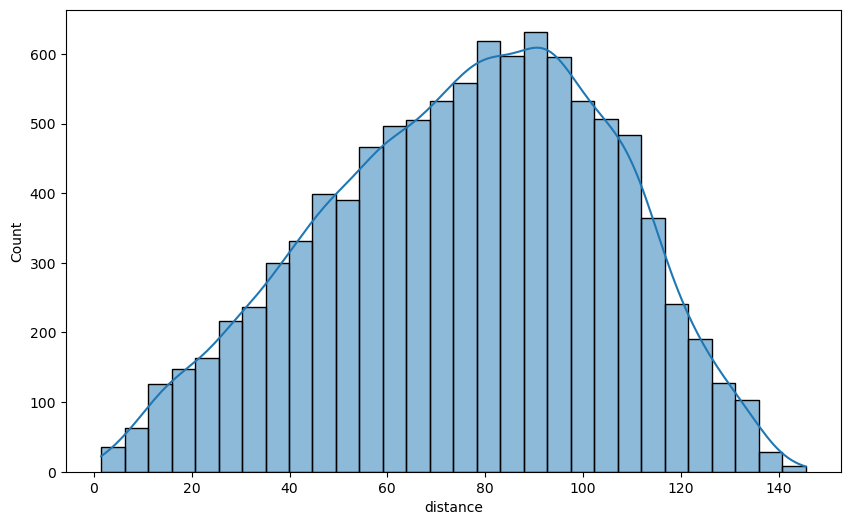

In [ ]:
from geopy.distance import geodesic


# Function to calculate distance between user and merchant locations
def calculate_distance(row):
    user_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(user_location, merchant_location).kilometers

# Apply distance calculation
df['distance'] = df.apply(calculate_distance, axis=1)

print(df['distance'].describe())
print('skewness', df['distance'].skew()) # -0.24, largely symmetrical distribution with a slight pull to the left

# Display the distribution of distances 
plt.figure(figsize=(10, 6))
sns.histplot(df['distance'], bins=30, kde=True)

distance_bins = [0, 20, 50, 100, 150]  # Ranges for categorization
distance_labels = ["local_0-20_km", "close_21-50_km", "moderate_51-100_km", "far_101-150_km"]

# Create a new column with distance categories
df['distance_category'] = pd.cut(df['distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)

df.head()

In [28]:
df = pd.read_csv('../csv/credit_card_fraud_2019_q1.csv')

In [29]:
# Load the CSV file
input_file = '../csv/credit_card_fraud_2019_q1.csv'  # Replace with your actual file name
output_file = '../csv/credit_card_fraud_2019_q1_15K_rows.csv'

# Read the CSV and extract the first 15,000 rows
df = pd.read_csv(input_file, nrows=15000)

# Save the extracted rows to a new CSV file
df.to_csv(output_file, index=False)

In [ ]:
df['cc_num'].unique() 

array([4499269417632698520,     346420582735828,    4961629578826674, ...,
          6586533791930521,     213102505373503,    6011074559874044],
      dtype=int64)

In [23]:
# Count the occurrences of each cc_num value
cc_num_counts = df['cc_num'].value_counts()

# Count how many cc_num values appear only once
unique_cc_num_count = (cc_num_counts == 1).sum()
unique_cc_num_count

0

In [27]:

def categorize_jobs(df, job_column="job"):
    """
    Categorizes jobs based on keywords derived from the latest refined job mapping
    and creates a new column 'job_cat'.
    
    Parameters:
    df (DataFrame): The dataframe containing the job column.
    job_column (str): The name of the column that contains job titles.
    
    Returns:
    DataFrame: The dataframe with a new column 'job_cat' containing the job categories.
    """
    # Define the latest refined job mapping
    refined_job_mapping = {
        "Healthcare & Medical": ["Nurse", "Midwife", "Immunologist", "Mental health nurse", "Child psychotherapist", 
                                  "Speech and language therapist", "Clinical molecular geneticist", "Scientist",
                                  "Doctor", "Physician", "Surgeon", "Hospital doctor", "General practitioner",
                                  "Clinical scientist", "Radiologist", "Psychiatrist", "Dentist", "Optometrist",
                                  "Pharmacist", "Therapist", "Physiotherapist", "Oncologist", "Neurologist",
                                  "Cardiologist", "Pediatrician", "Endocrinologist", "Urologist", "Chiropractor",
                                  "Anesthesiologist", "Dietitian", "Orthodontist", "Paramedic", "Occupational therapist",
                                  "General practice doctor", "Health physicist", "Radiographer, therapeutic", "Psychologist, clinical",
                                  "Orthoptist", "Ophthalmologist", "Haematologist", "Pathologist", "Toxicologist",
                                  "Homeopath", "Nurse, mental health", "Optician", "Ambulance", "Health"],
        "Engineering & Technical": ["Engineer", "Automotive engineer", "Water engineer", "Operations geologist", 
                                    "Electrical engineer", "Mechanical engineer", "Chemical engineer", "Civil engineer",
                                    "Aerospace engineer", "Biomedical engineer", "Environmental engineer", "Structural engineer", 
                                    "Industrial engineer", "Mining engineer", "Engineer, control and instrumentation",
                                    "Technologist", "Technician", "Hydrologist", "Hydrogeologist", "Arboriculturist", "Tree surgeon"],
        "Software & IT": ["IT consultant", "Software developer", "Data scientist", "Cybersecurity analyst",
                          "System administrator", "Network engineer", "Telecom specialist", "Machine learning engineer", 
                          "Robotics engineer", "AI specialist", "DevOps engineer", "Database administrator", "Web developer",
                          "Cloud architect", "Game developer", "Games", "Application", "Programmer", "Systems developer"],
        "Education & Training": ["Teacher", "Outdoor activities/education manager", "Professor", "Lecturer", "Tutor",
                                 "Trainer", "Instructional designer", "Education consultant", "Principal", "School counselor",
                                 "Curriculum developer", "Teacher, secondary school", "Librarian"],
        "Finance & Accounting": ["Dealer", "Financial analyst", "Accountant", "Auditor", "Investment banker", 
                                 "Economist", "Bank manager", "Actuary", "Tax consultant", "Insurance agent",
                                 "Financial planner", "Risk analyst", "Loan officer", "Financial adviser", 
                                 "Accountant, chartered public finance", "Tax", "Trader", "Investment", "Insurance"],
        "Business & Management": ["Facilities manager", "Event organiser", "Project manager", "Operations manager", 
                                  "HR manager", "Business consultant", "Strategy consultant", "Executive director",
                                  "Entrepreneur", "Supply chain manager", "Management consultant", "Secretary", "Executive",
                                  "Officer", "Director", "Administrator"],
        "Government & Public Sector": ["Research officer, government", "Surveyor, building control", "Information officer", 
                                       "Policy analyst", "Public relations officer", "Government administrator", "Urban planner", 
                                       "Customs officer", "Diplomat", "Legislative assistant", "Forensic scientist"],
        "Creative & Media": ["Printmaker", "Graphic designer", "Journalist", "Photographer", "Videographer", 
                             "Illustrator", "Animator", "Film director", "Content creator", "Editor", "Copywriter", 
                             "Fashion designer", "Interior designer", "Colour technologist", "Camera", "Broadcast", 
                             "Magazine", "Broadcasting", "Film", "Video", "Designer", "Television", "Theatre", "Radio"],
        "Consulting": ["Business consultant", "IT consultant", "Strategy consultant", "Legal consultant", "Adviser", "Advice"],
        "Agriculture & Environmental": ["Farmer", "Agronomist", "Food scientist", "Environmental scientist", "Ecologist", "Park ranger", "Forestry technician",
                                          "Hydrologist", "Hydrogeologist", "Herpetologist", "Arboriculturist", "Tree surgeon"],
    }
    
    # Categorize job based on keyword matching
    def find_category(job_title):
        for category, keywords in refined_job_mapping.items():
            if any(keyword.lower() in job_title.lower() for keyword in keywords):
                return category
        return "Other"
    
    # Apply categorization function to the job column
    df["job_cat"] = df[job_column].apply(find_category)
    
    return df



# Apply the function to categorize jobs in the dataset
df = categorize_jobs(df, job_column="job")

# Display first few rows to confirm
df.head()
df['job_cat'].value_counts()


job_cat
Other                          1152508
Healthcare & Medical            514167
Business & Management           452570
Engineering & Technical         402981
Creative & Media                320214
Finance & Accounting            160591
Education & Training            141004
Software & IT                    53018
Consulting                       15322
Agriculture & Environmental       7763
Government & Public Sector        6143
Name: count, dtype: int64